In [1]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
import seaborn as sns

In [3]:
sago = sca.savitzky_golay([1008, 1010, 1012, 1042, 1044, 1046, 1048, 1050],21,11,2,3)

In [4]:
df = sago.get_aligned_signal_componets()

x range: 4.0 282.0


In [5]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.columns

MultiIndex([(1008,   'Raw_122'),
            (1008,    'Sg_122'),
            (1008, 'resid_122'),
            (1008,   'rms_122'),
            (1008,  'rmso_122'),
            (1008,   'Raw_123'),
            (1008,    'Sg_123'),
            (1008, 'resid_123'),
            (1008,   'rms_123'),
            (1008,  'rmso_123'),
            ...
            (1050,   'Raw_252'),
            (1050,    'Sg_252'),
            (1050, 'resid_252'),
            (1050,   'rms_252'),
            (1050,  'rmso_252'),
            (1050,   'Raw_253'),
            (1050,    'Sg_253'),
            (1050, 'resid_253'),
            (1050,   'rms_253'),
            (1050,  'rmso_253')],
           length=120)

In [6]:
cdf = df.corr()

In [7]:

def yield_rmso_crossgroup_corr(same_group=False, col_type="rmso_",yield_with_colnames = False):
    cols = [c for c in cdf.columns if c[1].startswith(col_type)]
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if (cols[i][0] == cols[j][0])==same_group: # different groups
                print(cols[i], cols[j])
                if yield_with_colnames:
                    yield ((cols[i], cols[j]), cdf.loc[cols[i],cols[j]])
                else:
                    yield cdf.loc[cols[i],cols[j]]

In [8]:
rm_cg = list(yield_rmso_crossgroup_corr())

(1008, 'rmso_122') (1010, 'rmso_128')
(1008, 'rmso_122') (1010, 'rmso_129')
(1008, 'rmso_122') (1010, 'rmso_130')
(1008, 'rmso_122') (1012, 'rmso_134')
(1008, 'rmso_122') (1012, 'rmso_135')
(1008, 'rmso_122') (1012, 'rmso_136')
(1008, 'rmso_122') (1042, 'rmso_227')
(1008, 'rmso_122') (1042, 'rmso_228')
(1008, 'rmso_122') (1042, 'rmso_229')
(1008, 'rmso_122') (1044, 'rmso_233')
(1008, 'rmso_122') (1044, 'rmso_234')
(1008, 'rmso_122') (1044, 'rmso_235')
(1008, 'rmso_122') (1046, 'rmso_239')
(1008, 'rmso_122') (1046, 'rmso_240')
(1008, 'rmso_122') (1046, 'rmso_241')
(1008, 'rmso_122') (1048, 'rmso_245')
(1008, 'rmso_122') (1048, 'rmso_246')
(1008, 'rmso_122') (1048, 'rmso_247')
(1008, 'rmso_122') (1050, 'rmso_251')
(1008, 'rmso_122') (1050, 'rmso_252')
(1008, 'rmso_122') (1050, 'rmso_253')
(1008, 'rmso_123') (1010, 'rmso_128')
(1008, 'rmso_123') (1010, 'rmso_129')
(1008, 'rmso_123') (1010, 'rmso_130')
(1008, 'rmso_123') (1012, 'rmso_134')
(1008, 'rmso_123') (1012, 'rmso_135')
(1008, 'rmso

In [9]:
rm_same = list(yield_rmso_crossgroup_corr(True))

(1008, 'rmso_122') (1008, 'rmso_123')
(1008, 'rmso_122') (1008, 'rmso_124')
(1008, 'rmso_123') (1008, 'rmso_124')
(1010, 'rmso_128') (1010, 'rmso_129')
(1010, 'rmso_128') (1010, 'rmso_130')
(1010, 'rmso_129') (1010, 'rmso_130')
(1012, 'rmso_134') (1012, 'rmso_135')
(1012, 'rmso_134') (1012, 'rmso_136')
(1012, 'rmso_135') (1012, 'rmso_136')
(1042, 'rmso_227') (1042, 'rmso_228')
(1042, 'rmso_227') (1042, 'rmso_229')
(1042, 'rmso_228') (1042, 'rmso_229')
(1044, 'rmso_233') (1044, 'rmso_234')
(1044, 'rmso_233') (1044, 'rmso_235')
(1044, 'rmso_234') (1044, 'rmso_235')
(1046, 'rmso_239') (1046, 'rmso_240')
(1046, 'rmso_239') (1046, 'rmso_241')
(1046, 'rmso_240') (1046, 'rmso_241')
(1048, 'rmso_245') (1048, 'rmso_246')
(1048, 'rmso_245') (1048, 'rmso_247')
(1048, 'rmso_246') (1048, 'rmso_247')
(1050, 'rmso_251') (1050, 'rmso_252')
(1050, 'rmso_251') (1050, 'rmso_253')
(1050, 'rmso_252') (1050, 'rmso_253')


RMS-O cross-group corr: 0.066 ± 0.17
RMS-O within-group corr:
      0.157 ± 0.18


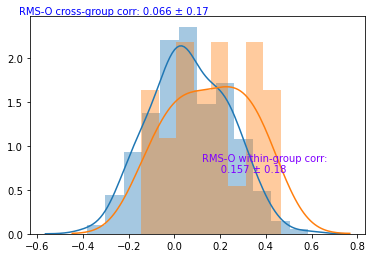

In [10]:
sns.distplot(rm_cg, bins=12)
sns.distplot(rm_same,bins=8)
stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "RMS-O cross-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(rm_cg)) 
str2 = "RMS-O within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(rm_same))
plt.text(-0.68,2.5, str1,color=(0,0,1))
plt.text(0.12,0.7, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [11]:
rm1_cg = list(yield_rmso_crossgroup_corr(False,"rms_"))
rm1_same = list(yield_rmso_crossgroup_corr(True,"rms_"))

(1008, 'rms_122') (1010, 'rms_128')
(1008, 'rms_122') (1010, 'rms_129')
(1008, 'rms_122') (1010, 'rms_130')
(1008, 'rms_122') (1012, 'rms_134')
(1008, 'rms_122') (1012, 'rms_135')
(1008, 'rms_122') (1012, 'rms_136')
(1008, 'rms_122') (1042, 'rms_227')
(1008, 'rms_122') (1042, 'rms_228')
(1008, 'rms_122') (1042, 'rms_229')
(1008, 'rms_122') (1044, 'rms_233')
(1008, 'rms_122') (1044, 'rms_234')
(1008, 'rms_122') (1044, 'rms_235')
(1008, 'rms_122') (1046, 'rms_239')
(1008, 'rms_122') (1046, 'rms_240')
(1008, 'rms_122') (1046, 'rms_241')
(1008, 'rms_122') (1048, 'rms_245')
(1008, 'rms_122') (1048, 'rms_246')
(1008, 'rms_122') (1048, 'rms_247')
(1008, 'rms_122') (1050, 'rms_251')
(1008, 'rms_122') (1050, 'rms_252')
(1008, 'rms_122') (1050, 'rms_253')
(1008, 'rms_123') (1010, 'rms_128')
(1008, 'rms_123') (1010, 'rms_129')
(1008, 'rms_123') (1010, 'rms_130')
(1008, 'rms_123') (1012, 'rms_134')
(1008, 'rms_123') (1012, 'rms_135')
(1008, 'rms_123') (1012, 'rms_136')
(1008, 'rms_123') (1042, 'rm

<AxesSubplot:>

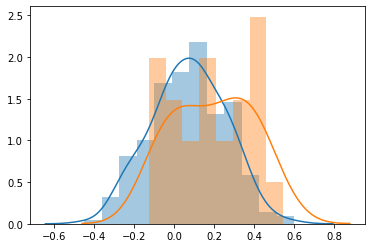

In [12]:
sns.distplot(rm1_cg, bins=12)
sns.distplot(rm1_same,bins=8)


In [13]:
raw_same = list(yield_rmso_crossgroup_corr(True,"Raw_"))
sg_same = list(yield_rmso_crossgroup_corr(True,"Sg_")) 


(1008, 'Raw_122') (1008, 'Raw_123')
(1008, 'Raw_122') (1008, 'Raw_124')
(1008, 'Raw_123') (1008, 'Raw_124')
(1010, 'Raw_128') (1010, 'Raw_129')
(1010, 'Raw_128') (1010, 'Raw_130')
(1010, 'Raw_129') (1010, 'Raw_130')
(1012, 'Raw_134') (1012, 'Raw_135')
(1012, 'Raw_134') (1012, 'Raw_136')
(1012, 'Raw_135') (1012, 'Raw_136')
(1042, 'Raw_227') (1042, 'Raw_228')
(1042, 'Raw_227') (1042, 'Raw_229')
(1042, 'Raw_228') (1042, 'Raw_229')
(1044, 'Raw_233') (1044, 'Raw_234')
(1044, 'Raw_233') (1044, 'Raw_235')
(1044, 'Raw_234') (1044, 'Raw_235')
(1046, 'Raw_239') (1046, 'Raw_240')
(1046, 'Raw_239') (1046, 'Raw_241')
(1046, 'Raw_240') (1046, 'Raw_241')
(1048, 'Raw_245') (1048, 'Raw_246')
(1048, 'Raw_245') (1048, 'Raw_247')
(1048, 'Raw_246') (1048, 'Raw_247')
(1050, 'Raw_251') (1050, 'Raw_252')
(1050, 'Raw_251') (1050, 'Raw_253')
(1050, 'Raw_252') (1050, 'Raw_253')
(1008, 'Sg_122') (1008, 'Sg_123')
(1008, 'Sg_122') (1008, 'Sg_124')
(1008, 'Sg_123') (1008, 'Sg_124')
(1010, 'Sg_128') (1010, 'Sg_129')


Raw intra-group corr: 0.131 ± 0.19
sg intra-group corr: 0.170 ± 0.32


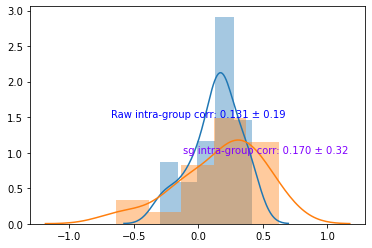

In [14]:
sns.distplot(raw_same)
sns.distplot(sg_same)

stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "Raw intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(raw_same)) 
str2 = "sg intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(sg_same))
plt.text(-0.68,1.5, str1,color=(0,0,1))
plt.text(-0.12,1., str2,color=(0.5,0,1))
print(str1)
print(str2)

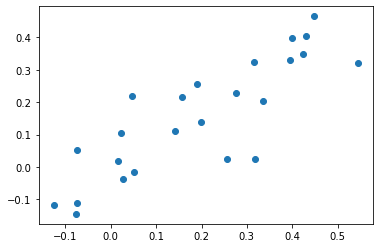

In [15]:
plt.scatter(rm1_same, rm_same)

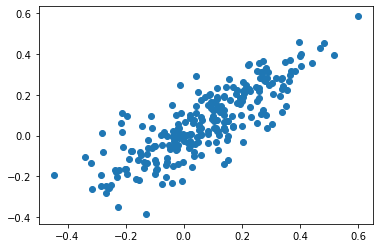

In [16]:
plt.scatter(rm1_cg, rm_cg)

In [ ]:
sum((x-y)**2 for x, y in zip(rm1_cg,rm_cg))

In [20]:
high_rmso = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True) if corr > 0.35]

(1008, 'rmso_122') (1008, 'rmso_123')
(1008, 'rmso_122') (1008, 'rmso_124')
(1008, 'rmso_123') (1008, 'rmso_124')
(1010, 'rmso_128') (1010, 'rmso_129')
(1010, 'rmso_128') (1010, 'rmso_130')
(1010, 'rmso_129') (1010, 'rmso_130')
(1012, 'rmso_134') (1012, 'rmso_135')
(1012, 'rmso_134') (1012, 'rmso_136')
(1012, 'rmso_135') (1012, 'rmso_136')
(1042, 'rmso_227') (1042, 'rmso_228')
(1042, 'rmso_227') (1042, 'rmso_229')
(1042, 'rmso_228') (1042, 'rmso_229')
(1044, 'rmso_233') (1044, 'rmso_234')
(1044, 'rmso_233') (1044, 'rmso_235')
(1044, 'rmso_234') (1044, 'rmso_235')
(1046, 'rmso_239') (1046, 'rmso_240')
(1046, 'rmso_239') (1046, 'rmso_241')
(1046, 'rmso_240') (1046, 'rmso_241')
(1048, 'rmso_245') (1048, 'rmso_246')
(1048, 'rmso_245') (1048, 'rmso_247')
(1048, 'rmso_246') (1048, 'rmso_247')
(1050, 'rmso_251') (1050, 'rmso_252')
(1050, 'rmso_251') (1050, 'rmso_253')
(1050, 'rmso_252') (1050, 'rmso_253')


In [21]:
high_rmso

[(((1044, 'rmso_233'), (1044, 'rmso_234')), 0.3990615121063543),
 (((1046, 'rmso_239'), (1046, 'rmso_240')), 0.40315603053167404),
 (((1046, 'rmso_239'), (1046, 'rmso_241')), 0.46553413750443223)]

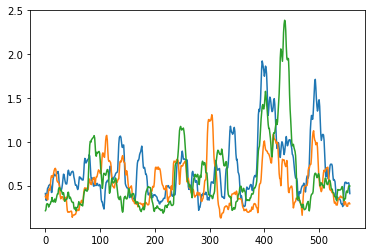

In [19]:
plt.plot(df[(1046, 'rmso_239')])
plt.plot(df[(1046, 'rmso_240')])
plt.plot(df[(1046, 'rmso_241')])


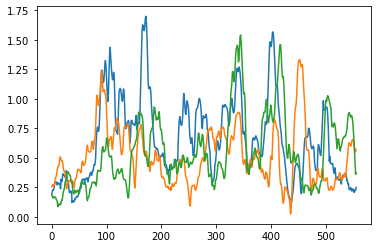

In [23]:
plt.plot(df[(1044, 'rmso_233')])
plt.plot(df[(1044, 'rmso_235')])
plt.plot(df[(1044, 'rmso_234')])


In [24]:
resid_sg = list(yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=False,col_type='resid_'))
resid_cg = list(yield_rmso_crossgroup_corr(same_group=False,yield_with_colnames=False,col_type='resid_'))

(1008, 'resid_122') (1008, 'resid_123')
(1008, 'resid_122') (1008, 'resid_124')
(1008, 'resid_123') (1008, 'resid_124')
(1010, 'resid_128') (1010, 'resid_129')
(1010, 'resid_128') (1010, 'resid_130')
(1010, 'resid_129') (1010, 'resid_130')
(1012, 'resid_134') (1012, 'resid_135')
(1012, 'resid_134') (1012, 'resid_136')
(1012, 'resid_135') (1012, 'resid_136')
(1042, 'resid_227') (1042, 'resid_228')
(1042, 'resid_227') (1042, 'resid_229')
(1042, 'resid_228') (1042, 'resid_229')
(1044, 'resid_233') (1044, 'resid_234')
(1044, 'resid_233') (1044, 'resid_235')
(1044, 'resid_234') (1044, 'resid_235')
(1046, 'resid_239') (1046, 'resid_240')
(1046, 'resid_239') (1046, 'resid_241')
(1046, 'resid_240') (1046, 'resid_241')
(1048, 'resid_245') (1048, 'resid_246')
(1048, 'resid_245') (1048, 'resid_247')
(1048, 'resid_246') (1048, 'resid_247')
(1050, 'resid_251') (1050, 'resid_252')
(1050, 'resid_251') (1050, 'resid_253')
(1050, 'resid_252') (1050, 'resid_253')
(1008, 'resid_122') (1010, 'resid_128')


In [25]:
resid_sg = np.array(resid_sg)
resid_cg = np.array(resid_cg)

Resid cross-group corr:
0.004 ± 0.10
Resid within-group corr:
      0.095 ± 0.13


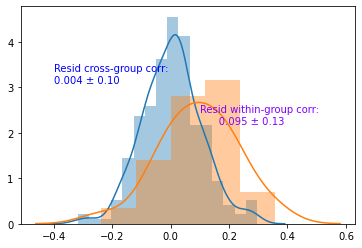

In [26]:
sns.distplot(resid_cg)

sns.distplot(resid_sg)

str1 = "Resid cross-group corr:\n{:.3f} \u00b1 {:.2f}".format(*stats(resid_cg)) 
str2 = "Resid within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(resid_sg))
plt.text(-0.4,3.1, str1,color=(0,0,1))
plt.text(0.1,2.2, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(resid_cg, resid_sg, equal_var=False)

In [ ]:
print("same group: {:.3f} \u00b1 {:.2f}".format(resid_sg.mean(), resid_sg.std()))
print("cross group: {:.3f} \u00b1 {:.2f}".format(resid_cg.mean(), resid_cg.std()))

In [ ]:
high_resid = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True,col_type='resid_') if corr > 0.2]

In [ ]:

high_resid

In [ ]:
print(dfc[(1008,'rmso_122')][(1008,'rmso_123')])
print(dfc[(1010,'rmso_128')][(1010,'rmso_130')])

In [ ]:
plt.plot(df[(1008, 'resid_122')])
plt.plot(df[(1008, 'resid_123')])

In [ ]:
plt.plot(df[(1001, 'resid_101')])
plt.plot(df[(1001, 'resid_103')])

In [ ]:
plt.plot(df[(1010, 'rmso_128')])
plt.plot(df[(1010, 'rmso_130')])

In [ ]:
sns.set()

In [ ]:
sns.lineplot(np.arange(len(df)), df[(1007,'resid_120')])
sns.lineplot(np.arange(len(df)), df[(1007,'rms_120')])
plt.legend(['residual','rms'])

In [ ]:
data = gdd.get_db_data()
test_pars = list(data.get_signal_by_series_type_and_interp_type([112,117],2,3))
test_pars

In [ ]:
plt.plot(test_pars[0][1][:,1])
plt.plot(test_pars[1][1][:,1])

In [ ]:
group_compts1004 = sago.group_signal_components(1004)
group_compts1006 = sago.group_signal_components(1006)

In [ ]:
plt.plot(zscore(test_pars[0][1][:,1]))
plt.plot(group_compts1004['Raw_112']+2)

plt.plot(group_compts1004['Sg_112']+group_compts1004['resid_112']+4)

plt.plot(df[(1004,'Raw_112')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['Raw_117']+2)

plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'Raw_117')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['rms_117']+2)

#plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'rms_117')]+6)

In [ ]:
np.corrcoef(df[(1006,'rms_117')], df[(1004,'rms_112')])

In [ ]:
rm_same = list(yield_rmso_crossgroup_corr(True))

In [ ]:
np.corrcoef(group_compts1004['rmso_112'],group_compts1006['rmso_117'])

In [ ]:
[len(x) for x in group_compts1004.values()]

In [ ]:
p1 = list(sca.yield_group_signals(1004,2,3))
p1

In [ ]:
dfc = df.corr()

In [ ]:
dfc.columns

In [ ]:
dfc[(1006,'rms_117')].index

In [ ]:
dfc.index